# EDA

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 

df = pd.read_csv("firestick_reviews_cleaned.csv")

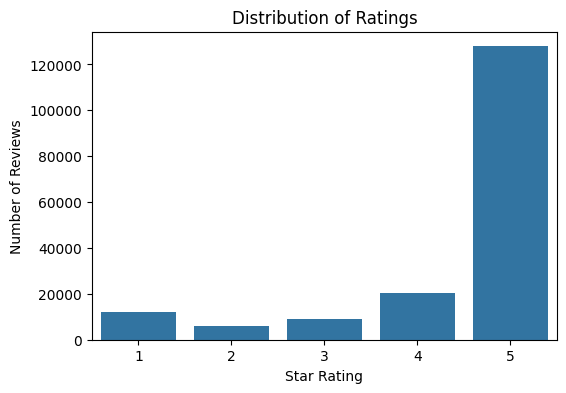

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x="rating", data=df)
plt.title("Distribution of Ratings")
plt.xlabel("Star Rating")
plt.ylabel("Number of Reviews")


plt.savefig("../outputs/distribution_of_ratings.jpg", format='jpg', dpi=100)   #graph of distribution of stars

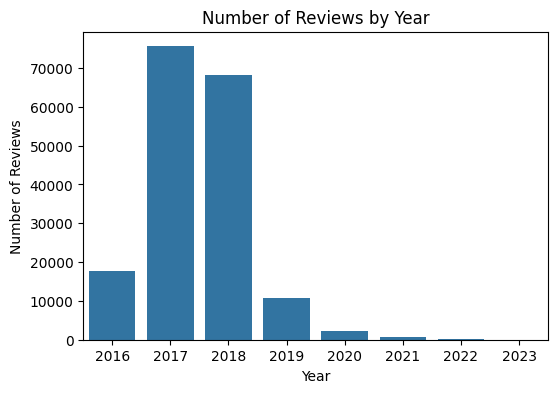

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x="timestamp", data=df, order=sorted(df['timestamp'].unique()))
plt.title("Number of Reviews by Year")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.savefig("../outputs/number_of_reviews_by_year.jpg", format='jpg', dpi=100)   #graph of distribution of reviews by year

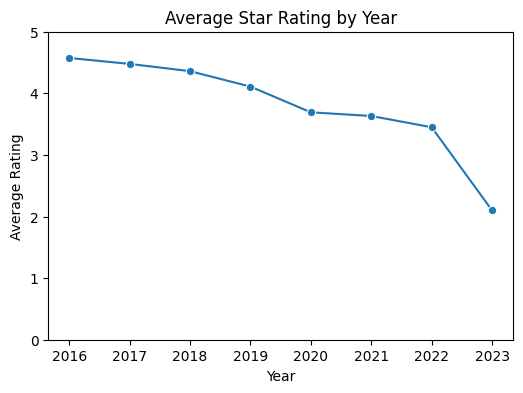

In [14]:
avg_rating_by_year = df.groupby("timestamp")["rating"].mean().reset_index()

plt.figure(figsize=(6,4))
sns.lineplot(x="timestamp", y="rating", data=avg_rating_by_year, marker="o")
plt.title("Average Star Rating by Year")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.ylim(0, 5)
plt.savefig("../outputs/average_star_rating_by_year.jpg", format='jpg', dpi=100)  #graph of average star per year 

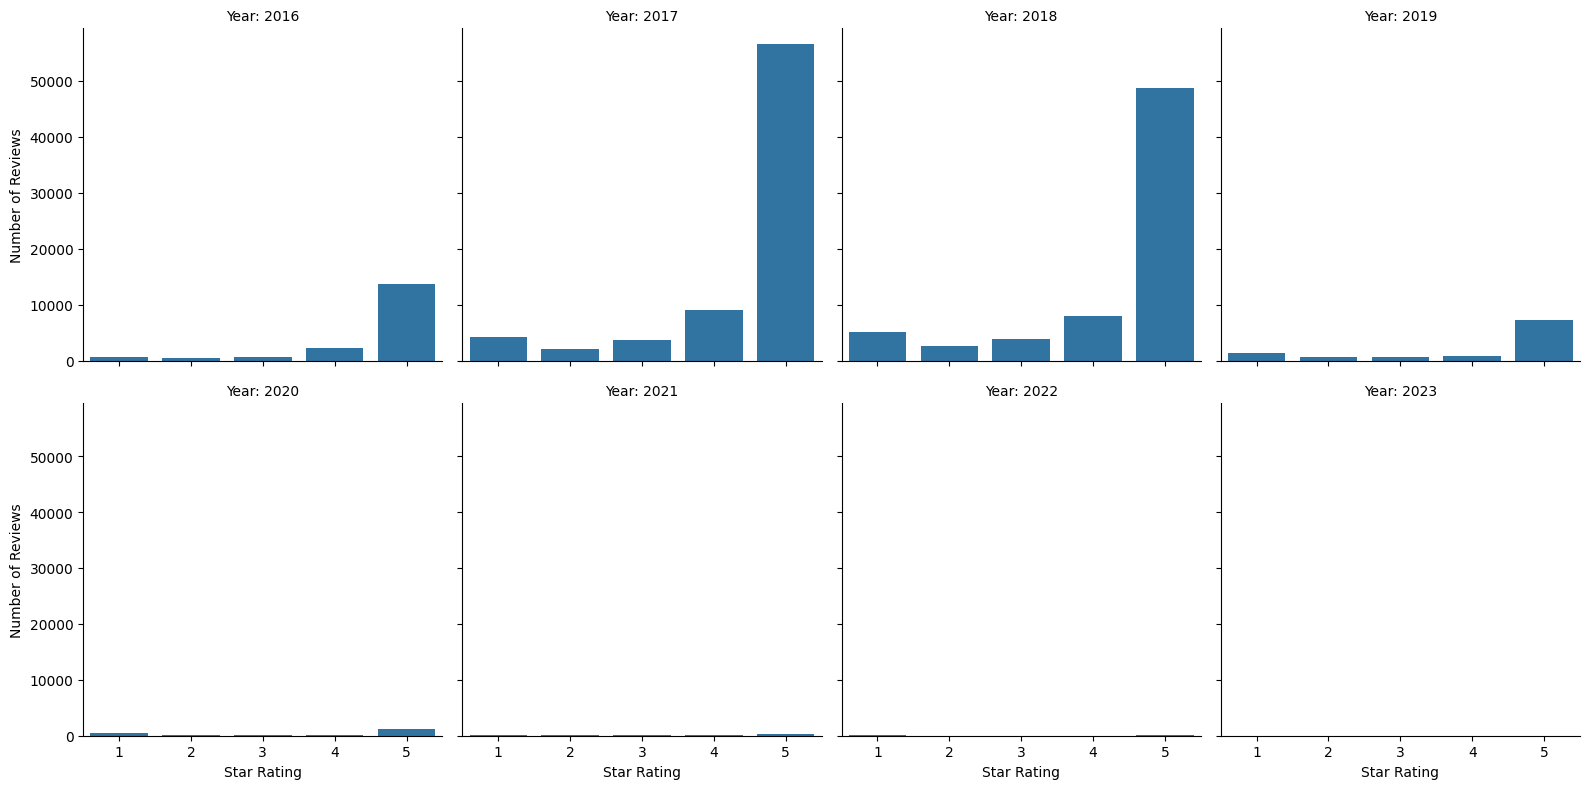

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

df['timestamp'] = pd.to_numeric(df['timestamp'], errors='coerce')
g = sns.FacetGrid(df, col="timestamp", col_wrap=4, height=4, sharey=True)
g.map(sns.countplot, "rating", order=[1,2,3,4,5])

g.set_axis_labels("Star Rating", "Number of Reviews")
g.set_titles("Year: {col_name}")
plt.tight_layout()
plt.savefig("../outputs/ratings_by_year.jpg", format='jpg', dpi=100)  #bar graphs of each star per year 

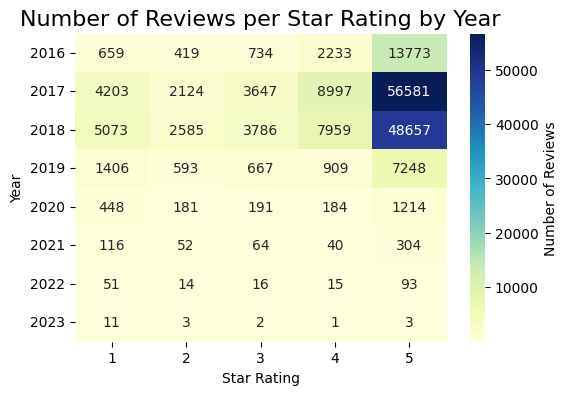

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

df['timestamp'] = pd.to_numeric(df['timestamp'], errors='coerce')

star_table = pd.crosstab(df['timestamp'], df['rating'])
star_table = star_table[[1, 2, 3, 4, 5]]  

plt.figure(figsize=(6,4))
sns.heatmap(
    star_table,
    annot=True,          
    fmt="d",              
    cmap="YlGnBu",        
    cbar_kws={'label': 'Number of Reviews'}
)
plt.title("Number of Reviews per Star Rating by Year", fontsize=16)
plt.xlabel("Star Rating")
plt.ylabel("Year")
plt.yticks(rotation=0)  
plt.savefig("../outputs/heatmap_of_reviews.jpg", format='jpg', dpi=100)  #heatmap of number of reviews per star by year 